# Clustering


Wikipedia: Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, and bioinformatics.

## K-means

Suppose we have a data set $X = \{x_1 , \cdots , x_N\}$ consisting of $N$ observations of a random $D$-dimensional Euclidean variable $x$. Our goal is to partition the data set into some number $K$ of clusters, where we shall suppose for the moment that the value of $K$ is given. Intuitively, we might think of a cluster as comprising a group of data points whose inter-point distances are small compared with the distances to points outside of the cluster. We can formalize this notion by first introducing a set of D-dimensional vectors $\mu_k , where $k = 1, \cdots , K$, in which $\mu_k$ is a **prototype$ associated with the $k^{th}$ cluster. As we shall see shortly, we can think of the $\mu_k$ as representing the centres of the clusters. Our goal is then to find an assignment of data points to clusters, as well as a set of vectors $\{\mu_k\}$, such that the sum of the squares of the distances of each data point to its closest vector $\mu_k$ , is a minimum.

It is convenient at this point to define some notation to describe the assignment of data points to clusters. For each data point $x_i$ , we introduce a corresponding set of binary indicator variables $r_{ik} \in \{0, 1\}$, where $k = 1, \cdots , K$ describing which of the $K$ clusters the data point $x_i$ is assigned to, so that if data point $x_i$ is assigned to cluster $k$ then $r_{ik} = 1$, and $r_{ij} = 0$ for $j \neq k$. This is known as the 1-of-$K$ coding scheme. We can then define an objective function, sometimes called a distortion measure, given by

$$
J = \sum_i^N \sum_k^K r_{ik} ||x_i - \mu_k||^2
$$
which represents the sum of the squares of the distances of each data point to its assigned vector $\mu_k$ . Our goal is to find values for the {$r_{ik}$} and the {$\mu_k$ } so as to minimize J. We can do this through an iterative procedure in which each iteration involves two successive steps corresponding to successive optimizations with respect to the $r_{ik}$ and the $\mu_k$ . First we choose some initial values for the $\mu_k$ . Then in the first phase we minimize J with respect to the $r_{ik}$ , keeping the $\mu_k$ fixed. In the second phase we minimize J with respect to the $\mu_k$ , keeping $r_{ik}$ fixed. This two-stage optimization is then repeated until convergence. We shall see that these two stages of updating $r_{ik}$ and updating $\mu_k$ correspond respectively to the E (expectation) and M (maximization) steps of the EM algorithm, and to emphasize this we shall use the terms E step and M step in the context of the K-means algorithm.

Consider first the determination of the $r_{ik}$ . Because $J$ in is a linear function of $r_{ik}$ , this optimization can be performed easily to give a closed form solution. The terms involving different $i$ are independent and so we can optimize for each $i$ separately by choosing $r_{ik}$ to be 1 for whichever value of $k$ gives the minimum value of $||x_i − \mu_k||^2$ . In other words, we simply assign the $i$th data point to the closest cluster centre. More formally, this can be expressed as

\begin{equation}
  r_{ik}=\begin{cases}
    1, & \text{if } k = \arg\min_j ||x_i − \mu_j||^2.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

Now consider the optimization of the $\mu_k$ with the $r_{ik}$ held fixed. The objective function $J$ is a quadratic function of $\mu_k$, and it can be minimized by setting its derivative with respect to $\mu_k$ to zero giving
$$
2 \sum_i r_{ik}(x_i - \mu_k) = 0
$$

which we can easily solve for $\mu_k$ to give
$$
\mu_k = \frac{\sum_i r_{ik}x_i}{\sum_i r_{ik}}
$$

The denominator in this expression is equal to the number of points assigned to cluster $k$, and so this result has a simple interpretation, namely set $\mu_k$ equal to the mean of all of the data points $x_i$ assigned to cluster $k$. For this reason, the procedure is known as the $K$-means algorithm.

The two phases of re-assigning data points to clusters and re-computing the cluster means are repeated in turn until there is no further change in the assignments (or until some maximum number of iterations is exceeded). Because each phase reduces the value of the objective function $J$, convergence of the algorithm is assured. However, it may converge to a local rather than global minimum of $J$.

/home/ed203246/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


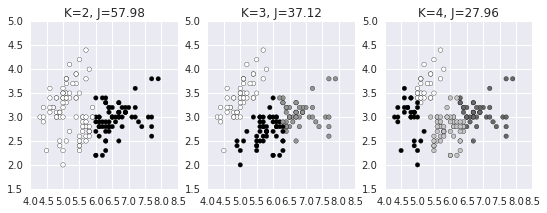

In [3]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2]  # use only 'sepal length and sepal width'
y_iris = iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3)) 
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)

## Ward clustering
